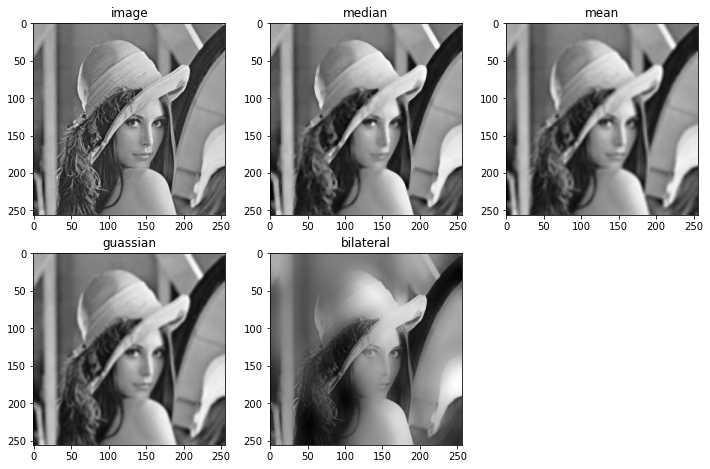

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("lena_256x256.png",0)

#低通
img_median=cv2.medianBlur(image,5) #中值濾波
img_mean=cv2.blur(image,(5,5)) #均值濾波
img_Gaussian=cv2.GaussianBlur(image,(7,7),0)#高斯濾波
img_bilater=cv2.bilateralFilter(image,40,75,75) #雙邊濾波

tags = [image, img_median, img_mean, img_Gaussian,  img_bilater]
titles = ['image','median', 'mean', 'guassian', 'bilateral']

plt.figure(figsize=(12,12));
for i in range(5):
    plt.subplot(3,3,i+1)
    plt.imshow(tags[i],cmap='gray')
    plt.title(titles[i])
plt.show()

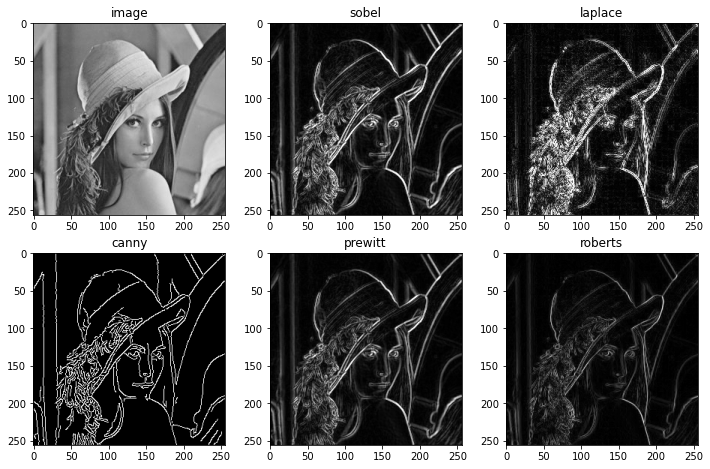

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("lena_256x256.png",0)
#https://www.3chy2.com.tw/3c%E8%B3%87%E8%A8%8A/python-%E5%9C%96%E5%83%8F%E8%99%95%E7%90%86-opencv-%EF%BC%8812%EF%BC%89%EF%BC%9A-roberts-%E7%AE%97%E5%AD%90%E3%80%81-prewitt-%E7%AE%97%E5%AD%90%E3%80%81-sobel-%E7%AE%97%E5%AD%90%E5%92%8C-laplacian/

#sobel
image_sobel_horizon  = cv2.Sobel(image, cv2.CV_16S, 0, 1)
image_sobel_veritcal = cv2.Sobel(image, cv2.CV_16S, 1, 0)

image_sobel_horizon_abs = cv2.convertScaleAbs(image_sobel_horizon)
image_sobel_veritcal_abs = cv2.convertScaleAbs(image_sobel_veritcal)
image_sobel = cv2.addWeighted(image_sobel_horizon_abs, 0.5, image_sobel_veritcal_abs, 0.5, 0)

image_sobel = cv2.convertScaleAbs(image_sobel)
image_sobel_veritcal = cv2.convertScaleAbs(image_sobel_veritcal)
image_sobel_horizon = cv2.convertScaleAbs(image_sobel_horizon)

#laplace
image_laplace = cv2.Laplacian(image, cv2.CV_16S, ksize=3)
image_laplace = cv2.convertScaleAbs(image_laplace)

#canny
image_gaussian = cv2.GaussianBlur(image, (3, 3), 0)
image_canny = cv2.Canny(image_gaussian, 50, 150)

#prewitt
prewitt_kernal_x = np.array([[1,1,1],[0,0,0],[-1,-1,-1]],dtype=int)
prewitt_kernal_y = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=int)
prewitt_horizon = cv2.filter2D(image, cv2.CV_16S, prewitt_kernal_x)
prewitt_vertical = cv2.filter2D(image, cv2.CV_16S, prewitt_kernal_y)
prewitt_horizon_abs = cv2.convertScaleAbs(prewitt_horizon)
prewitt_vertical_abs = cv2.convertScaleAbs(prewitt_vertical)
image_prewitt = cv2.addWeighted(prewitt_horizon_abs, 0.5, prewitt_vertical_abs, 0.5, 0)

# Roberts 
roberts_kernel_x = np.array([[-1, 0], [0, 1]], dtype=int)
roberts_kernel_y = np.array([[0, -1], [1, 0]], dtype=int)
roberts_horizon = cv2.filter2D(image, cv2.CV_16S, roberts_kernel_x)
roberts_vertical = cv2.filter2D(image, cv2.CV_16S, roberts_kernel_y)
roberts_horizon_abs = cv2.convertScaleAbs(roberts_horizon)
roberts_vertical_abs = cv2.convertScaleAbs(roberts_vertical)
image_roberts = cv2.addWeighted(roberts_horizon_abs, 0.5, roberts_vertical_abs, 0.5, 0)


tags = [image,image_sobel, image_laplace, image_canny, image_prewitt,  image_roberts]
titles = ['image', 'sobel', 'laplace', 'canny', 'prewitt', 'roberts']

plt.figure(figsize=(12,12));
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(tags[i],cmap='gray')
    plt.title(titles[i])
plt.show()


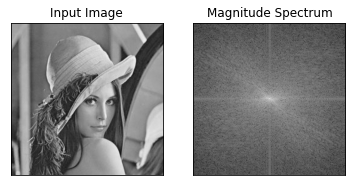

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("lena_256x256.png",0)
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread("lena_256x256.png",0)
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])